<a href="https://colab.research.google.com/github/pharringtonp19/econometrics/blob/main/notebooks/optimization/Loss_landscapes_and_optimization_in_over_parameterized_non_linear_systems_and_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import jax 
import jax.numpy as jnp 
from functools import partial 

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
from mpl_toolkits import mplot3d
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
def f(x, y):
  return (jnp.sin(x) -y)**2

def f_(z):
  return f(z[0], z[1])

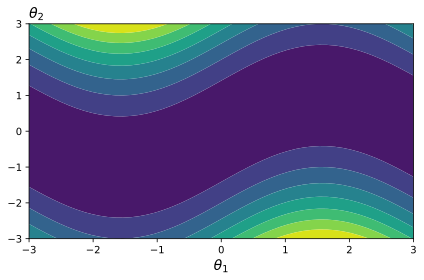

In [ ]:
#@title **Contour Plot: Loss Fn** { display-mode: "form" }
x, y = jnp.mgrid[-3:3:50j,-3:3:50j]
z = jax.vmap(jax.vmap(f))(x, y)
fig = plt.figure(dpi=300, tight_layout=True)
plt.contourf(x, y, z) #levels=[0.5, 1., 2., 3.0, 4.0, 5.0] 
#plt.plot(jnp.linspace(-3., 3., 200), jnp.sin(jnp.linspace(-3., 3., 200)))
plt.title(r'$\theta_2$', loc='left', size=14)
plt.xlabel(r'$\theta_1$', size=14)
plt.show()

In [77]:
def g(x, y):
  z = jnp.array([x, y])
  h = jax.hessian(f_)(z)
  r, _ = jnp.linalg.eig(h) #jnp.linalg.matrix_rank(h) 
  return jnp.min(r)

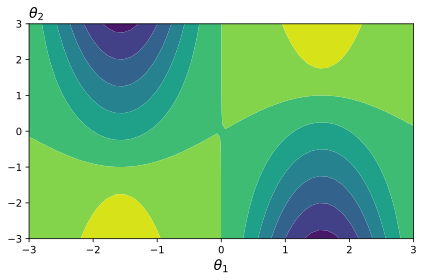

In [81]:
#@title **Contour Plot: Rank of Hessian** { display-mode: "form" }
x, y = jnp.mgrid[-3:3:50j,-3:3:50j]
z = jax.vmap(jax.vmap(g))(x, y)
fig = plt.figure(dpi=300, tight_layout=True)
plt.contourf(x, y, z) 
# xs = jnp.linspace(-3., 3., 50)
# ys = jnp.sin(xs)
# zs = jax.vmap(g)(xs, ys)
# plt.plot(xs, ys)
plt.title(r'$\theta_2$', loc='left', size=14)
plt.xlabel(r'$\theta_1$', size=14)
plt.show()

In [ ]:
def m(w, x, y):
  z = jnp.array([x, y])
  A = jax.hessian(f_)(w)
  return jnp.dot(jnp.dot(z, A),z)

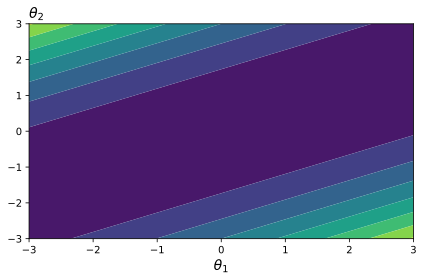

In [73]:
#@title **Contour Plot: Local Approx** { display-mode: "form" }

m_w = partial(m, jnp.array([1., jnp.sin(1.)]))
x, y = jnp.mgrid[-3:3:50j,-3:3:50j]
z = jax.vmap(jax.vmap(m_w))(x, y)
fig = plt.figure(dpi=300, tight_layout=True)
plt.contourf(x, y, z)
#plt.plot(jnp.linspace(-3., 3., 200), jnp.sin(jnp.linspace(-3., 3., 200)))
plt.title(r'$\theta_2$', loc='left', size=14)
plt.xlabel(r'$\theta_1$', size=14)
plt.show()

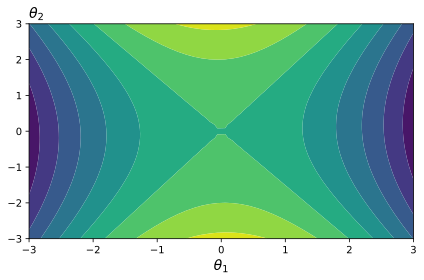

In [74]:
#@title **Contour Plot: Local Approx** { display-mode: "form" }

m_w = partial(m, jnp.array([1.5, -1.5]))
x, y = jnp.mgrid[-3:3:50j,-3:3:50j]
z = jax.vmap(jax.vmap(m_w))(x, y)
fig = plt.figure(dpi=300, tight_layout=True)
plt.contourf(x, y, z) #, levels=[0.5, 1., 2., 3.0, 4.0, 5.0])
#plt.plot(jnp.linspace(-3., 3., 200), jnp.sin(jnp.linspace(-3., 3., 200)))
plt.title(r'$\theta_2$', loc='left', size=14)
plt.xlabel(r'$\theta_1$', size=14)
plt.show()